In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [121]:
%run dietary_faotools.py

In [26]:
get_land_saved(231, 'meats', 2000, 2002)  

{'local': 121468706.65741283,
 'remote': 22201265.647506367,
 'total': 143669972.30491915}

In [122]:
land_use_dict = {}
for year in range(start_year,end_year + 1):
    local_res = 0.0
    remote_res = 0.0
    total_res = 0.0
    for area in areapd.loc[areapd['Country Group'] == 'European Union']['Country Code'].tolist():
        result = get_land_saved(area, 'sugar', 2000, year)    
        local_res += result['local']
        remote_res += result['remote']
        total_res += result['total']
    land_use_dict[year] = (local_res,remote_res,total_res)
    #printing year just for clocking the code
    print(year)

1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


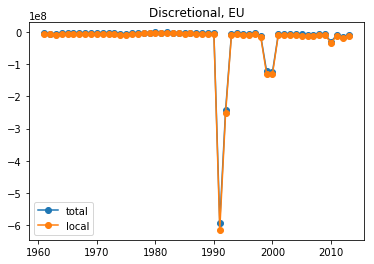

In [123]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o',label = 'total')
plt.plot(land_use_dict.keys(),[x[0] for x in list(land_use_dict.values())],'-o', label = 'local')
plt.title('Discretional, EU')
plt.legend()
plt.show()

In [124]:
new_land_dict = remove_outlier(land_use_dict,0)
new_land_dict = remove_outlier(new_land_dict,2)

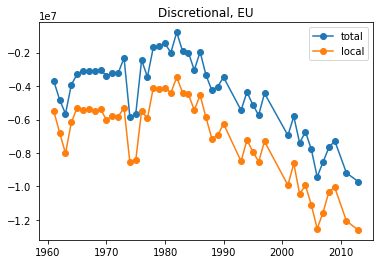

In [125]:
plt.plot(new_land_dict.keys(),[x[2] for x in list(new_land_dict.values())],'-o',label = 'total')
plt.plot(new_land_dict.keys(),[x[0] for x in list(new_land_dict.values())],'-o', label = 'local')
plt.title('Discretional, EU')
plt.legend()
plt.show()

### Some other examples of result

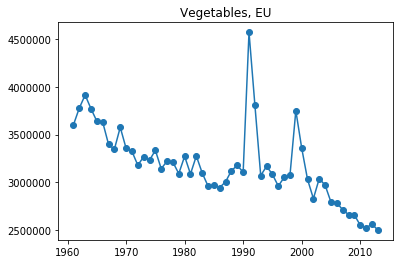

In [249]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Vegetables, EU')
plt.show()

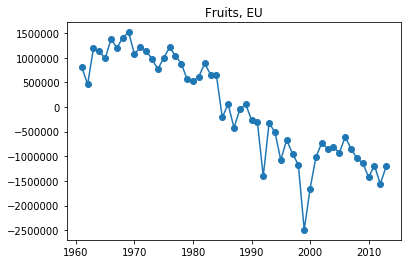

In [187]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Fruits, EU')
plt.show()

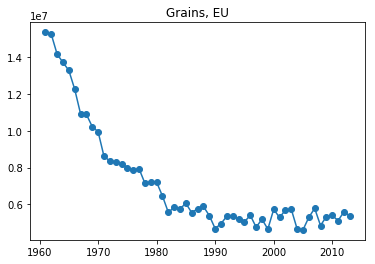

In [189]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Grains, EU')
plt.show()

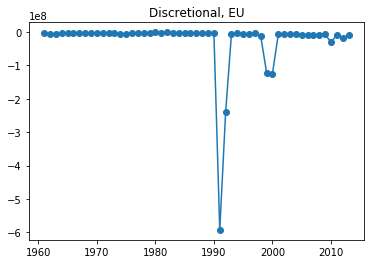

In [242]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Discretional, EU')
plt.show()

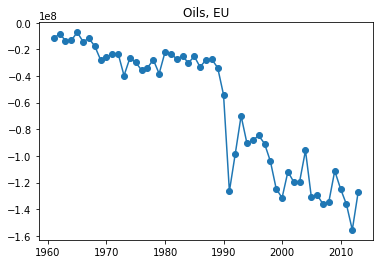

In [216]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Oils, EU')
plt.show()

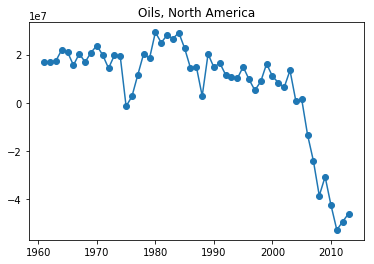

In [220]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Oils, North America')
plt.show()

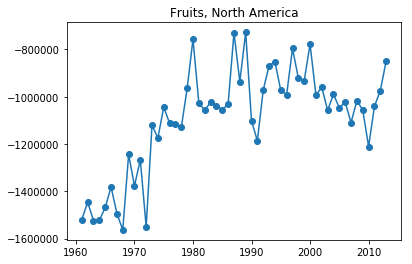

In [224]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Fruits, North America')
plt.show()

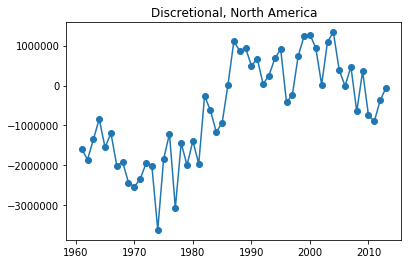

In [226]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Discretional, North America')
plt.show()

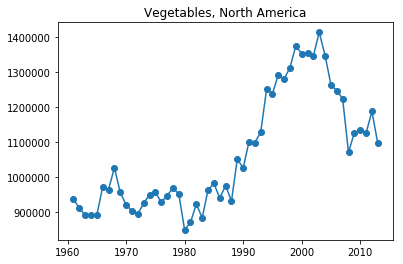

In [240]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Vegetables, North America')
plt.show()

#### The following is not important. It was used during building the code.

In [3]:
def get_sub_continent(area_code):
    _area_subcontinent = list(set(areapd.loc[areapd['Country Code'] == area_code]['Country Group Code'].tolist()).intersection(subcontinent_codes))[0]
    if _area_subcontinent == 5302:
        _area_subcontinent = 5300
    elif _area_subcontinent == 5304:
        _area_subcontinent = 5303
    elif _area_subcontinent == 5504:
        _area_subcontinent = 5500
    return _area_subcontinent

In [9]:
def get_livestock_production(area_code,item_code,year,_import = True, _export = True, _cull = True):
#no cull adjustment needed now as we are dealing with import export of the product directly. No involvement of carcass 
#weights too
#table2 only has [867,882,1807,1035,1808]
    
    #adjusting meat,chicken and meat_poultry
    mult = 1.0
    if item_code == 1058:
        _item_code = 1808
    else:
        _item_code = item_code
    #done
    if _item_code != butter_code:
        _production = get_estimated_data(livestockpd,area_code,_item_code,production_code,year) #this is in tonnes
    else:
        _production = get_estimated_data(livestockprocessed,area_code,_item_code,production_code,year)#in tonnes
    _import = get_estimated_data(tradepd,area_code,_item_code,import_quantity_code,year) #in tonnes
    _export = get_estimated_data(tradepd,area_code,_item_code,export_quantity_code,year) #in tonnes
    net_production = _production + _export - _import
    #in tonnes
    _prod = {'T':net_production, 'P':0.0,'ML':0.0}
    _area_subcontinent = get_sub_continent(area_code)    
    _dict_ML =  table2pd.loc[(table2pd['aggregatecode'] == _area_subcontinent) & (table2pd['system'] == 'ML') & (table2pd['itemcode'] ==_item_code)].to_dict()
    a_ml, b_ml, c_ml = list(_dict_ML['a'].values())[0],list(_dict_ML['b'].values())[0],list(_dict_ML['c'].values())[0]
    year_p = year - 1970
    ml_frac = a_ml*(year_p**2) + b_ml*(year_p) + c_ml
    if ml_frac > 1:
        ml_frac = 1
    elif ml_frac < 0:
        ml_frac = 0
    else:
        ml_frac = ml_frac
    p_frac = 1 - ml_frac
    _prod['P'] = net_production*p_frac
    _prod['ML'] = net_production*ml_frac
    #returns in tonnes
    return _prod
    
def get_the_ML_frac(table,sub_continent,item_code,year):
    year_p = year - 1970
    _dict_ML =  table.loc[(table['aggregatecode'] == sub_continent) & (table['system'] == 'ML') & (table['itemcode'] == item_code)].to_dict()
    a_ml, b_ml, c_ml = list(_dict_ML['a'].values())[0],list(_dict_ML['b'].values())[0],list(_dict_ML['c'].values())[0]
    _val = a_ml*(year_p**2) + b_ml*(year_p) + c_ml
    if _val < 0:
        return 0
    elif _val >1:
        return 1
    else:
        return _val
    
def get_the_P_frac(table,sub_continent,item_code,year):
    year_p = year - 1970
    _dict_ML =  table.loc[(table['aggregatecode'] == sub_continent) & (table['system'] == 'P') & (table['itemcode'] == item_code)].to_dict()
    a_ml, b_ml, c_ml = list(_dict_ML['a'].values())[0],list(_dict_ML['b'].values())[0],list(_dict_ML['c'].values())[0]
    _val = a_ml*(year_p**2) + b_ml*(year_p) + c_ml
    if _val < 0:
        return 0
    elif _val >1:
        return 1
    else:
        return _val
    
        
    
    
    
def get_pastoral_mixed_landless(area_code,item_code,year):
    total_pasture = get_estimated_data(landusepd,area_code,perm_pasture_code,area_element_code,year) + get_estimated_data(landusepd,area_code,temp_pasture_code,area_element_code,year)
    if total_pasture == 0.0:
        total_pasture = 0.69*get_estimated_data(landusepd,area_code,agriculture_land_code,area_element_code,year)
    #this gives total pasture in 1000 hectares
    _area_subcontinent = get_sub_continent(area_code)
    year_p = year - 1970
    _dict_P = table9pd.loc[(table9pd['aggregatecode'] == _area_subcontinent) & (table9pd['system'] == 'P')].to_dict()
    _dict_ML = table9pd.loc[(table9pd['aggregatecode'] == _area_subcontinent) & (table9pd['system'] == 'ML')].to_dict()
    
    a_p, b_p, c_p = list(_dict_P['a'].values())[0],list(_dict_P['b'].values())[0],list(_dict_P['c'].values())[0]
    a_ml, b_ml, c_ml = list(_dict_ML['a'].values())[0],list(_dict_ML['b'].values())[0],list(_dict_ML['c'].values())[0]
    
    p_frac = a_p*(year_p**2) + b_p*(year_p) + c_p
    ml_frac = a_ml*(year_p**2) + b_ml*(year_p) + c_ml
    pastoral_area = total_pasture*p_frac #in 1000 hectares
    mixedlandless_area = total_pasture*ml_frac #in 1000 hectares
    
    stocks = {k:0.0 for k in bovine_meat_codes + ovine_meat_codes}
    
    for k in stocks.keys():
        _animal_code = meat_animal_mappings[k]
        mult = 1000 if liveanimalspd.loc[liveanimalspd['Item Code'] == _animal_code]['Unit'].values[0] == '1000 Head' else 1.0
        if k not in milkeggs_meat_mappings.values(): #an animal that does not produce milk/eggs
            stocks[k] = mult*get_estimated_data(liveanimalspd,area_code,_animal_code,stocks_code,year) #in heads
        else:
            _milkeggs_code = meat_milkeggs_mappings[k]
            stocks[k] = mult*get_estimated_data(liveanimalspd,area_code,_animal_code,stocks_code,year) - get_estimated_data(livestockpd,area_code,_milkeggs_code,producing_animals_code,year)
    
    new_stocks = {k:0.0 for k in bovine_meat_codes + ovine_meat_codes}
    for k in stocks.keys():
        similar_animal_meat = table267_similar_codes[k]
        _prod = get_estimated_data_for(livestockpd,area_code,k,production_code,year)
        _carcass = get_estimated_data_for(livestockpd,area_code,k,carcass_weight_code,year)*0.0001
        _offtake = get_estimated_data_for(livestockpd,area_code,k,producing_animals_code,year)
        
        _prod_ml = get_the_ML_frac(table2pd,_area_subcontinent,similar_animal_meat,year)*_prod
        _carcass_ml = get_the_ML_frac(table6pd,_area_subcontinent,similar_animal_meat,year)*_carcass
        _offtake_ml = get_the_ML_frac(table7pd,_area_subcontinent,similar_animal_meat,year)*_offtake
        
        _prod_p = _prod - _prod_ml
        _carcass_p = _carcass - _carcass_ml
        _offtake_p = _offtake - _offtake_ml
        
        ratio_p = (_prod_p*_offtake_p)/_carcass_p if _carcass_p != 0 else 0.0
        ratio_ml = (_prod_ml*_offtake_ml)/_carcass_ml if _carcass_ml != 0 else 0.0
        
        _p_ratio = ratio_p/(ratio_p + ratio_ml) if ratio_p + ratio_ml !=0 else 0.0
        _ml_ratio = ratio_ml/(ratio_p + ratio_ml) if ratio_p + ratio_ml !=0 else 0.0
        
        stocks_P = stocks[k]*_p_ratio
        new_stocks[k] = {'P': stocks_P, 'ML': stocks[k] - stocks_P}
    
    _val_P = new_stocks[item_code]['P']
    _val_ML = new_stocks[item_code]['ML']
    _set_P = [new_stocks[k]['P'] for k in new_stocks.keys()]
    _set_ML = [new_stocks[k]['ML'] for k in new_stocks.keys()]
    
    _value_P = _val_P*pastoral_area/sum(_set_P) if sum(_set_P) != 0 else 0.0
    _value_ML = _val_ML*mixedlandless_area/sum(_set_ML) if sum(_set_ML) != 0 else 0.0
    
    #this returns in hectares
    return {'P':  _value_P*1000, 'ML': _value_ML*1000}
    
    
    
    
def get_cropland_feed_area(area_code,item_code,year):
    year_p = year - 1970
    _area_subcontinent = get_sub_continent(area_code)
    _frac_dict = {k: 0.0 for k in all_codes}
    
    for k in _frac_dict.keys():
        _prod = get_livestock_production(area_code,all_codes_similar_mappings[k],year)
        _item_type = table4_code_reverse_mappings[all_codes_similar_mappings[k]]
        _dict_r =  table4pd.loc[(table4pd['aggregatecode'] == _area_subcontinent) & (table4pd['itemtypecode'] == _item_type)].to_dict()
        a_r, b_r, c_r = list(_dict_r['a'].values())[0],list(_dict_r['b'].values())[0],list(_dict_r['c'].values())[0]
        r_frac = a_r*(year_p**2) + b_r*(year_p) + c_r
        _similar_item = all_codes_similar_mappings[k]
        if _similar_item == 1035 or _similar_item == 1058:
            f_k = get_the_ML_frac(table10pd,_area_subcontinent,table10_reverse_mappings[_similar_item],year)
        else:
            f_k = get_the_P_frac(table10pd,_area_subcontinent,table10_reverse_mappings[_similar_item],year)
            + get_the_ML_frac(table10pd,_area_subcontinent,table10_reverse_mappings[_similar_item],year)
        _frac_dict[k] = _prod['ML']*r_frac*f_k
    
    feed_share = _frac_dict[item_code]/sum(_frac_dict.values())
    #print(feed_share)
    
    _sum = 0
    
    for feed_element in feed_items_in_crops:
        ssr = get_ssr(area_code,feed_element,year)
        if ssr > 1 or ssr < 0:
            ssr = 1.0
        feed_amount = get_estimated_data(foodbalancepd,area_code,crops_to_balance_mapping[feed_element],feed_code,year)
        
        feed_quantity = feed_share*ssr*feed_amount*1000 #in tonnes now
        
        _yield = get_estimated_data(cropspd,area_code,feed_element,yield_code,year)
        feed_quantity = feed_quantity/(0.0001*_yield) if _yield != 0 else 0.0
        _sum += feed_quantity
        #print(feed_quantity)
        
    #still need to return the p_i which need table information on which I am stuck!
    return _sum
    
def get_ssr(area_code,item_code,year):
    #here the item_code is item_code in food_balance_sheet
    _prod = get_estimated_data(cropspd,area_code,item_code,production_code,year)
    _imp =  get_estimated_data(tradepd,area_code,item_code,import_quantity_code,year)
    _exp =  get_estimated_data(tradepd,area_code,item_code,export_quantity_code,year)
    return _prod/(_prod + _imp - _exp) if (_prod + _imp - _exp)!= 0 else 0.0

def get_livestock_offtake(area_code,item_code,year):
# item_code has to be sheep/goat meat: 1807 or Meat,Cattle: 867
#returns in Head
    _num_prod_animals = get_estimated_data(livestockpd,area_code,item_code,producing_animals_code,year)  
    _off = {'T': _num_prod_animals, 'P':0.0,'ML':0.0}
    _area_subcontinent = get_sub_continent(area_code)    
    _dict_ML =  table7pd.loc[(table7pd['aggregatecode'] == _area_subcontinent) & (table7pd['system'] == 'P') & (table7pd['itemcode'] == item_code)].to_dict()
    a_ml, b_ml, c_ml = list(_dict_ML['a'].values())[0],list(_dict_ML['b'].values())[0],list(_dict_ML['c'].values())[0]
    year_p = year - 1970
    ml_frac = a_ml*(year_p**2) + b_ml*(year_p) + c_ml
    if ml_frac > 1:
        ml_frac = 1
    if ml_frac <0:
        ml_frac = 0
    p_frac = 1 - ml_frac
    _off['P'] = _num_prod_animals*p_frac
    _off['ML'] = _num_prod_animals*ml_frac
    return _off

def get_livestock_yield(area_code,item_code,year):
    if item_code in bovine_meat_codes + ovine_meat_codes:
        _prod = get_livestock_production(area_code,all_codes_similar_mappings[item_code],year)
        _cropland_feed_area = get_cropland_feed_area(area_code,item_code,year)
        _pasturemixedlandless = get_pastoral_mixed_landless(area_code,item_code,year)
        return (_prod['T'])/(_cropland_feed_area + _pasturemixedlandless['P'] + _pasturemixedlandless['ML']) if (_cropland_feed_area + _pasturemixedlandless['P'] + _pasturemixedlandless['ML'])!=0.0 else 0.0
    else:
        _prod = get_livestock_production(area_code,all_codes_similar_mappings[item_code],year)
        _cropland_feed_area = get_cropland_feed_area(area_code,item_code,year)                
        return _prod['T']/_cropland_feed_area
#returns in tonnes/hectare

In [81]:
get_pastoral_mixed_landless(231,867,2000)

{'P': 65826.92285080676, 'ML': 144369.97454011018}

In [ ]:
2731:[867], #beef
2732:[977,1017], #mutton
2733:[1035], #pork
2734:[1058], #poultry
2948:[882], #milk
2740:[886], #butter
2949:[1062], #eggs
}

In [41]:
from scipy import interpolate
x = [0,25,60]
y = [0.571,0.618,0.618]
f = interpolate.interp1d(x, y)
f = interpolate.interp1d(x, y)
c = f(0)
ab = f(1) - c
ab_bar = f(2) - c
a = (ab_bar - ab*2)/2
b = ab - a
print(a,b,c)

0.0 0.0018799999999999928 0.571


In [120]:
_1970

{'USA': {1035: 8, 1058: 4},
 'South America': {1035: 8, 1058: 5},
 'Eastern Africa': {1035: 8, 1058: 5},
 'Western Europe': {1035: 8, 1058: 4},
 'Middle East': {1035: 9, 1058: 5},
 'Former USSR': {1035: 9, 1058: 5},
 'World': {1035: 8.8, 1058: 4.5},
 'South Asia': {1035: 8, 1058: 5},
 'East Asia': {1035: 11, 1058: 5.5}}

In [94]:
region_mapping_bowman.values()

dict_values([[5203, 5200], [5207, 5204, 5206], [5101, 5102, 5103, 5104, 5100, 5105], [5404, 5706, 5402, 5403, 5600], [5305], [5401], [5000], [5303, 5500, 5501, 5502, 5503, 5404], [5202, 5301, 5300]])